In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')

C:\Users\lazar\AppData\Local\Temp\ipykernel_4936\2150459603.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [4]:
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.496500,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
5,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
6,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
7,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
8,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
9,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN


In [5]:
df_reduced = df.drop(columns=[
    'Non Use Code', 
    'Assessor Remarks', 
    'OPM remarks', 
    'Location', 
    'Date Recorded',
    'Serial Number'
]).copy()

In [6]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   List Year         1097629 non-null  int64  
 1   Town              1097629 non-null  object 
 2   Address           1097578 non-null  object 
 3   Assessed Value    1097629 non-null  float64
 4   Sale Amount       1097629 non-null  float64
 5   Sales Ratio       1097629 non-null  float64
 6   Property Type     715183 non-null   object 
 7   Residential Type  699240 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 67.0+ MB


In [7]:
df_reduced.isna().sum()

List Year                0
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    398389
dtype: int64

In [8]:
df_nona = df_reduced.fillna('Unknown').copy()

In [9]:
df_nona.head(10)

,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family
1,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family
2,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Unknown
3,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family
4,2021,Avon,12 BYRON DRIVE,179990.0,362500.0,0.496500,Residential,Condo
5,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family
6,2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family
7,2020,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family
8,2020,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family
9,2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo


In [10]:
df_sorted = df_nona.sort_values(by=('List Year'), ascending=True).reset_index(drop=True)

In [11]:
df_corr = df_sorted.copy()

In [12]:
df_corr.dtypes

List Year             int64
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
dtype: object

In [13]:
df_corr['Town'] = OrdinalEncoder().fit_transform(df[['Town']])
df_corr['Address'] = OrdinalEncoder().fit_transform(df[['Address']])
df_corr['Property Type'] = OrdinalEncoder().fit_transform(df[['Property Type']])
df_corr['Residential Type'] = OrdinalEncoder().fit_transform(df[['Residential Type']])

In [14]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   List Year         1097629 non-null  int64  
 1   Town              1097629 non-null  float64
 2   Address           1097578 non-null  float64
 3   Assessed Value    1097629 non-null  float64
 4   Sale Amount       1097629 non-null  float64
 5   Sales Ratio       1097629 non-null  float64
 6   Property Type     715183 non-null   float64
 7   Residential Type  699240 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 67.0 MB


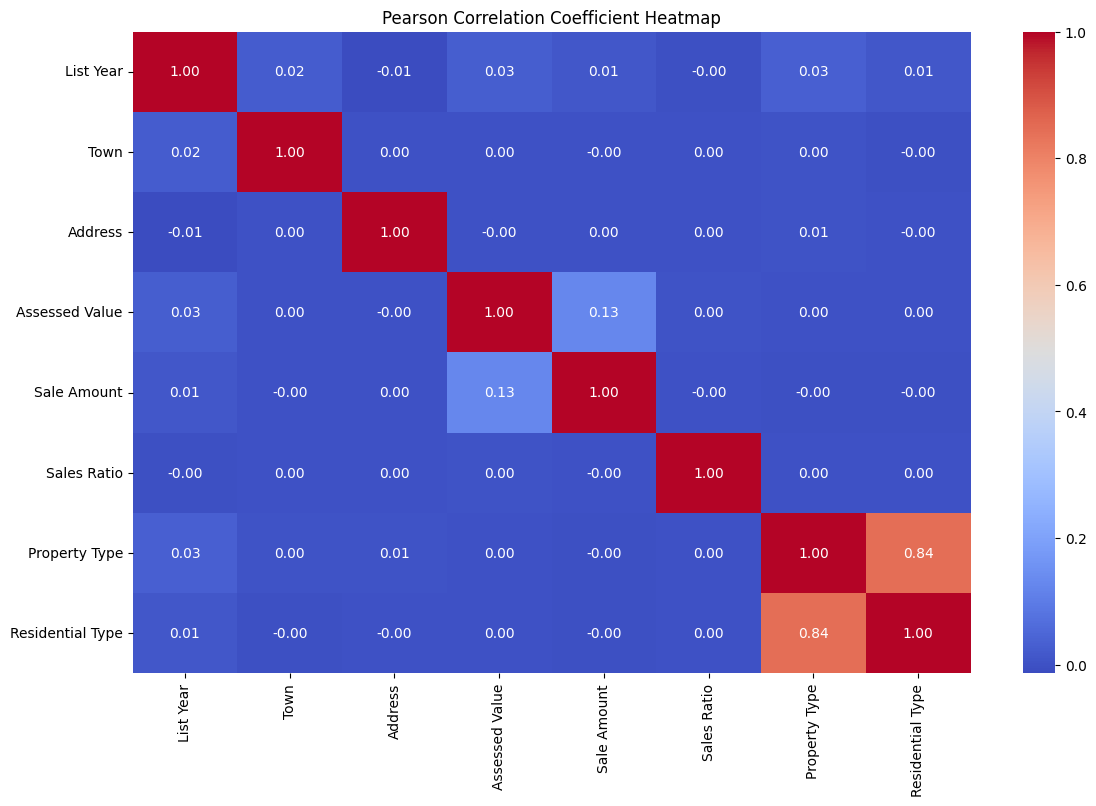

In [16]:
pearson_corr = df_corr.corr(method='pearson')

plt.figure(figsize=(12, 8))

sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')

plt.tight_layout()
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()